In [14]:
# Notebook for comparing move-types and their resulting likelihood trajectories

In [15]:
from pathlib import Path

import numpy as np
import pandas as pd
import scipy.sparse as sp

from sbm.io import GraphLoader
from sbm.model import SBMModel

from sbm.utils.pipeline_utils import (
    sbmfit_folderpath,
    FitConfig,
)

In [60]:
g = GraphLoader.load(
    Path("/Users/lmmi/anon_sbm/data/processed/congress_twitter.edgelist"),
    force_undirected=True, # type: ignore
    )

In [61]:
rng = np.random.default_rng(1) # type: ignore

In [ ]:
from sbm.block_assigner import AssignerConstructor

assigner_const = AssignerConstructor(rng=rng)
assigner = assigner_const.create_assigner(
    graph_data=g,
    min_block_size=5, # type: ignore
    init_method="metis_refine", # type: ignore
    )

In [68]:
min_block_size = 5
cooling_rate = 0.9999
max_blocks = None
patience  = int(1e3)
return_nll = True

In [69]:
initial_blocks = assigner.compute_assignment()
uniform_swap_model = SBMModel(
    initial_blocks=initial_blocks,
    rng=rng,
    change_freq = { # probabilities of trying each move type
        "uniform_swap": 1,
    },
)

uniform_nll = uniform_swap_model.fit(
    min_block_size=min_block_size,
    cooling_rate=cooling_rate,
    max_blocks=max_blocks,
    patience=10**3,
    return_nll=True,
)
block_data = uniform_swap_model.block_data

Stopping early after 34602 iterations due to patience limit.


In [72]:
initial_blocks = assigner.compute_assignment()
mix_swap_model = SBMModel(
    initial_blocks=initial_blocks,
    rng=rng,
    change_freq = { # probabilities of trying each move type
        #"uniform_swap": 0.5,
        "edge_based_swap": 1,
    },
)

mix_nll = mix_swap_model.fit(
    min_block_size=min_block_size,
    cooling_rate=cooling_rate,
    max_blocks=max_blocks,
    patience=10**3,
    return_nll=True,
)

Stopping early after 28371 iterations due to patience limit.


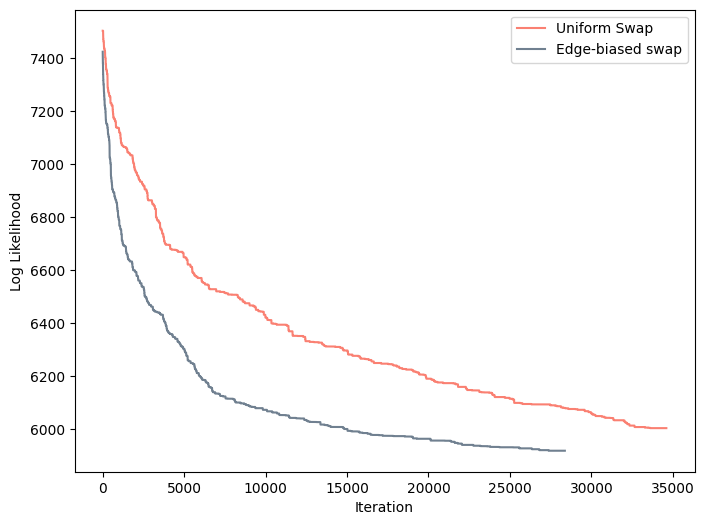

In [74]:
# comparing initial methods
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(np.arange(len(uniform_nll)),uniform_nll, label="Uniform Swap", color="salmon")# type: ignore

ax.plot(np.arange(len(mix_nll)), mix_nll, label="Edge-biased swap", color="slategrey") # type: ignore

ax.set_xlabel("Iteration")
ax.set_ylabel("Log Likelihood")

ax.legend()
plt.show(fig)

In [58]:
uniform_swap_model = SBMModel(
    initial_blocks=block_data,
    rng=rng,
    change_freq = { # probabilities of trying each move type
        "uniform_swap": 1.0,
    },
)

edge_swap_model = SBMModel(
    initial_blocks=block_data,
    rng=rng,
    change_freq = { # probabilities of trying each move type
    "edge_based_swap": 1.0,
    },
)
triad_swap_model = SBMModel(
    initial_blocks=block_data,
    rng=rng,
    change_freq = { # probabilities of trying each move type
    "triadic_swap": 1.0,
    },
)
cross_swap_model = SBMModel(
    initial_blocks=block_data,
    rng=rng,
    change_freq = { # probabilities of trying each move type
    "cross_triangle": 1.0,
    },
)
mix_swap_model = SBMModel(
    initial_blocks=block_data,
    rng=rng,
    change_freq = {
    "edge_based_swap": 0.6,
    "triadic_swap": 0.2,
    "twin_leaf": 0.15,
    "uniform_swap": 0.05
    },
)

In [49]:
uniform_nll = uniform_swap_model.fit(
    min_block_size=min_block_size,
    cooling_rate=cooling_rate,
    max_blocks=max_blocks,
    patience=patience,
    return_nll=return_nll,
)

Stopping early after 6552 iterations due to patience limit.


In [50]:
edge_nll = edge_swap_model.fit(
    min_block_size=min_block_size,
    cooling_rate=cooling_rate,
    max_blocks=max_blocks,
    patience=patience,
    return_nll=return_nll,
)

Stopping early after 11427 iterations due to patience limit.


In [51]:
triad_nll = triad_swap_model.fit(
    min_block_size=min_block_size,
    cooling_rate=cooling_rate,
    max_blocks=max_blocks,
    patience=patience,
    return_nll=return_nll,
)

Stopping early after 5153 iterations due to patience limit.


In [59]:
mix_nll = mix_swap_model.fit(
    min_block_size=min_block_size,
    cooling_rate=cooling_rate,
    max_blocks=max_blocks,
    patience=patience,
    return_nll=return_nll,
)

Stopping early after 1000 iterations due to patience limit.


In [ ]:
rng.normal(0, 1, size=1000).A1 # to make sure rng is not empty
oo
o

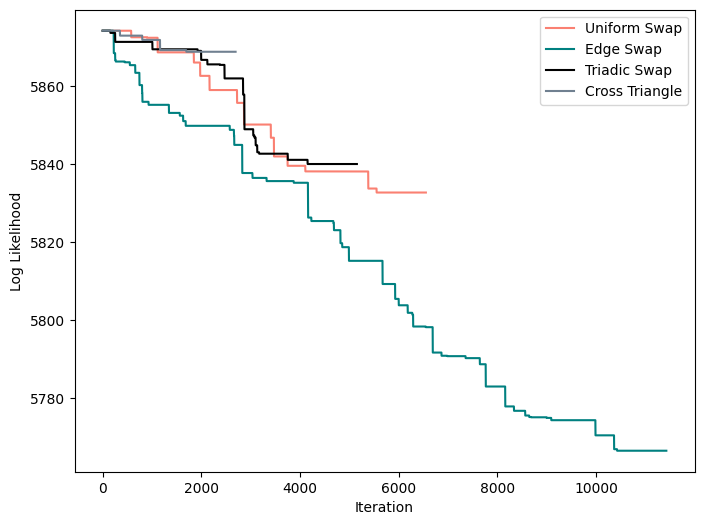

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(np.arange(len(uniform_nll)),uniform_nll, label="Uniform Swap", color="salmon")# type: ignore

ax.plot(np.arange(len(edge_nll)), edge_nll, label="Edge Swap", color="teal")# type: ignore

ax.plot(np.arange(len(triad_nll)), triad_nll, label="Triadic Swap", color="black") # type: ignore

ax.plot(np.arange(len(cross_nll)), cross_nll, label="Cross Triangle", color="slategrey") # type: ignore

ax.set_xlabel("Iteration")
ax.set_ylabel("Log Likelihood")

ax.legend()
plt.show(fig)